# Venture Funding with Deep Learning

You work as a risk management associate at Alphabet Soup, a venture capital firm. Alphabet Soup’s business team receives many funding applications from startups every day. This team has asked you to help them create a model that predicts whether applicants will be successful if funded by Alphabet Soup.

The business team has given you a CSV containing more than 34,000 organizations that have received funding from Alphabet Soup over the years. With your knowledge of machine learning and neural networks, you decide to use the features in the provided dataset to create a binary classifier model that will predict whether an applicant will become a successful business. The CSV file contains a variety of information about these businesses, including whether or not they ultimately became successful.

In [1]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

---

## Prepare the data to be used on a neural network model

In [2]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
applicant_data_df = pd.read_csv(Path("./Resources/applicants_data.csv"))

# Review the DataFrame
applicant_data_df.head()


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Review the data types associated with the columns
applicant_data_df.dtypes


EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [5]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df = applicant_data_df.drop(columns = ['EIN', 'NAME'])

# Review the DataFrame
applicant_data_df.head()


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
# Create a list of categorical variables 
categorical_variables = list(applicant_data_df.dtypes[applicant_data_df.dtypes == 'object'].index)

# Display the categorical variables list
categorical_variables


['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [7]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse = False)

In [8]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(applicant_data_df[categorical_variables])


In [9]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(encoded_data, columns = enc.get_feature_names(categorical_variables))

# Review the DataFrame
encoded_df.head()


,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame

#Create a dataframe with numerical values by dropping the columns with categorical data in the original dataframe
numerical_df = applicant_data_df.drop(columns = categorical_variables)

encoded_df = pd.concat([numerical_df, encoded_df], axis = 1)

# Review the Dataframe
# YOUR CODE HERE
encoded_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
# Define the target set y using the IS_SUCCESSFUL column
y = encoded_df['IS_SUCCESSFUL']

# Display a sample of y
y[:5]


0    1
1    1
2    0
3    1
4    1
Name: IS_SUCCESSFUL, dtype: int64

In [12]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = encoded_df.drop(columns = ['IS_SUCCESSFUL'])

# Review the features DataFrame
X.head()


,STATUS,ASK_AMT,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)


In [14]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


---

## Compile and Evaluate a Binary Classification Model Using a Neural Network

In [15]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features


116

In [16]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [17]:
# Define the number of hidden nodes for the first hidden layer
# The number of nodes is calculated by taking the mean of the input features and the output layer neurons
hidden_nodes_layer1 = (number_input_features + number_output_neurons) // 2

# Review the number hidden nodes in the first layer
hidden_nodes_layer1


58

In [18]:
# Define the number of hidden nodes for the second hidden layer
# The number of nodes is calculated by taking the mean of the nodes in the first hidden layer and the output layer neurons
hidden_nodes_layer2 =  (hidden_nodes_layer1 + number_output_neurons) // 2

# Review the number hidden nodes in the second layer
hidden_nodes_layer2


29

In [19]:
# Create the Sequential model instance
nn = Sequential()


In [20]:
# Add the first hidden layer
nn.add(Dense(units = hidden_nodes_layer1, input_dim = number_input_features, activation = 'relu'))


In [21]:
# Add the second hidden layer
nn.add(Dense(units = hidden_nodes_layer2, activation = 'relu'))

In [22]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units = number_output_neurons, activation = 'sigmoid'))


In [23]:
# Display the Sequential model summary
nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 58)                6786      
                                                                 
 dense_1 (Dense)             (None, 29)                1711      
                                                                 
 dense_2 (Dense)             (None, 1)                 30        
                                                                 
Total params: 8,527
Trainable params: 8,527
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the Sequential model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [25]:
# Fit the model using 50 epochs and the training data
model = nn.fit(X_train_scaled, y_train, epochs = 50)


Epoch 1/50
804/804 [==============================] - 1s 817us/step - loss: 0.5750 - accuracy: 0.7205
Epoch 2/50
804/804 [==============================] - 1s 794us/step - loss: 0.5531 - accuracy: 0.7290
Epoch 3/50
804/804 [==============================] - 1s 799us/step - loss: 0.5484 - accuracy: 0.7321
Epoch 4/50
804/804 [==============================] - 1s 794us/step - loss: 0.5473 - accuracy: 0.7322
Epoch 5/50
804/804 [==============================] - 1s 792us/step - loss: 0.5451 - accuracy: 0.7327
Epoch 6/50
804/804 [==============================] - 1s 800us/step - loss: 0.5445 - accuracy: 0.7344
Epoch 7/50
804/804 [==============================] - 1s 803us/step - loss: 0.5434 - accuracy: 0.7345
Epoch 8/50
804/804 [==============================] - 1s 791us/step - loss: 0.5425 - accuracy: 0.7350
Epoch 9/50
804/804 [==============================] - 1s 797us/step - loss: 0.5418 - accuracy: 0.7358
Epoch 10/50
804/804 [==============================] - 1s 796us/step - loss: 0.541

In [26]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose = 2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5560 - accuracy: 0.7294 - 382ms/epoch - 1ms/step
Loss: 0.5560493469238281, Accuracy: 0.7294460535049438


<AxesSubplot:>

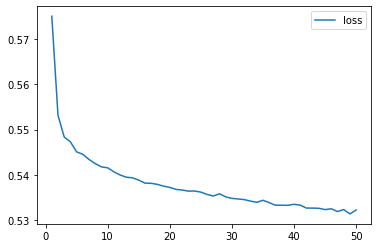

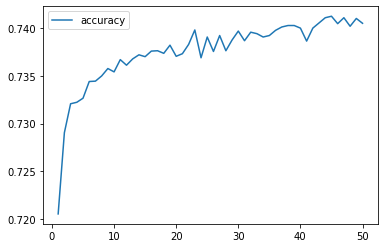

In [27]:
df = pd.DataFrame(model.history, index = range(1, len(model.history['loss']) + 1))

df.plot( y = 'loss')
df.plot( y = 'accuracy')

In [28]:
# Set the model's file path
file_path = './Resources/AlphabetSoup.h5'

# Export your model to a HDF5 file
nn.save(file_path)


---

## Optimize the neural network model


### Alternative Model 1

In [29]:
# Define Alternative model 1 using:
# 3 hidden layers
# The number of nodes for the first layer is calculated by taking the mean of the input features and the output layer neurons
# The number of nodes for the second layer is calculated by taking the mean of the first hidden layer nodes and the output layer neurons
# The number of nodes for the third layer is calculated by taking the mean of the second hidden layer nodes and the output layer neurons
# using tanh as the activation function

In [30]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

116

In [31]:
# Define the number of neurons in the output layer
number_output_neurons_A1 = 1

In [32]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A1 = (number_input_features + number_output_neurons_A1) // 2

# Review the number hidden nodes in the first layer
hidden_nodes_layer1_A1


58

In [33]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A1 =  (hidden_nodes_layer1_A1 + number_output_neurons_A1) // 2

# Review the number hidden nodes in the second layer
hidden_nodes_layer2_A1


29

In [34]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A1 =  (hidden_nodes_layer2_A1 + number_output_neurons_A1) // 2

# Review the number hidden nodes in the third layer
hidden_nodes_layer3_A1


15

In [35]:
# Create the Sequential model instance
nn_A1 = Sequential()

In [36]:
# First hidden layer
nn_A1.add(Dense(units = hidden_nodes_layer1_A1, input_dim = number_input_features, activation = 'tanh'))

# Second hidden layer
nn_A1.add(Dense(units = hidden_nodes_layer2_A1, activation = 'tanh'))

# Third hidden layer
nn_A1.add(Dense(units = hidden_nodes_layer3_A1, activation = 'tanh'))

# Output layer
nn_A1.add(Dense(units = number_output_neurons_A1, activation = 'sigmoid'))

# Check the structure of the model
nn_A1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 58)                6786      
                                                                 
 dense_4 (Dense)             (None, 29)                1711      
                                                                 
 dense_5 (Dense)             (None, 15)                450       
                                                                 
 dense_6 (Dense)             (None, 1)                 16        
                                                                 
Total params: 8,963
Trainable params: 8,963
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compile the Sequential model
nn_A1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [38]:
# Fit the model using 50 epochs and the training data
fit_model_A1 = nn_A1.fit(X_train_scaled, y_train, epochs = 50)


Epoch 1/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5698 - accuracy: 0.7177
Epoch 2/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5533 - accuracy: 0.7308
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5489 - accuracy: 0.7318
Epoch 4/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5473 - accuracy: 0.7333
Epoch 5/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5446 - accuracy: 0.7330
Epoch 6/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5440 - accuracy: 0.7355
Epoch 7/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5417 - accuracy: 0.7353
Epoch 8/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5416 - accuracy: 0.7343
Epoch 9/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5403 - accuracy: 0.7363
Epoch 10/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5393 - accuracy: 0.7376

In [40]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss_A1, model_accuracy_A1 = nn_A1.evaluate(X_test_scaled, y_test, verbose = 2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss_A1}, Accuracy: {model_accuracy_A1}")

268/268 - 0s - loss: 0.5529 - accuracy: 0.7304 - 226ms/epoch - 843us/step
Loss: 0.5528753995895386, Accuracy: 0.7303789854049683


<AxesSubplot:>

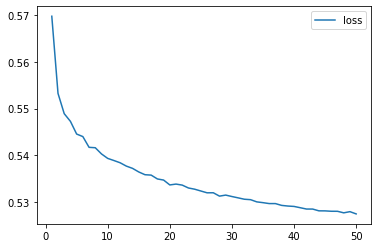

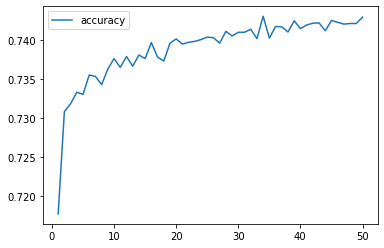

In [41]:
df_A1 = pd.DataFrame(fit_model_A1.history, index = range(1, len(fit_model_A1.history['loss']) + 1))

df_A1.plot( y = 'loss')
df_A1.plot( y = 'accuracy')

#### Alternative Model 2

In [42]:
# Define Alternative model 2 using:
# 2 hidden layers
# The number of nodes in the first layer is 75% of the number of input features
# The number of nodes in the second layer is 25% of the number of input features
#Activation function is relu

In [43]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

116

In [44]:
# Define the number of neurons in the output layer
number_output_neurons_A2 = 1

In [45]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A2 = int(number_input_features * 0.75)

# Review the number hidden nodes in the first layer
hidden_nodes_layer1_A2


87

In [46]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A2 =  int(number_input_features * 0.25)

# Review the number hidden nodes in the second layer
hidden_nodes_layer2_A2


29

In [47]:
# Create the Sequential model instance
nn_A2 = Sequential()

In [48]:
# First hidden layer
nn_A2.add(Dense(units = hidden_nodes_layer1_A2, input_dim = number_input_features, activation = 'relu'))

# Second hidden layer
nn_A2.add(Dense(units = hidden_nodes_layer2_A2, activation = 'relu'))

# Output layer
nn_A2.add(Dense(units = number_output_neurons_A2, activation = 'sigmoid'))

# Check the structure of the model
nn_A2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 87)                10179     
                                                                 
 dense_8 (Dense)             (None, 29)                2552      
                                                                 
 dense_9 (Dense)             (None, 1)                 30        
                                                                 
Total params: 12,761
Trainable params: 12,761
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Compile the Sequential model
nn_A2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [50]:
# Fit the model using 50 epochs and the training data
fit_model_A2 = nn_A2.fit(X_train_scaled, y_train, epochs = 50)


Epoch 1/50
804/804 [==============================] - 1s 951us/step - loss: 0.5742 - accuracy: 0.7169
Epoch 2/50
804/804 [==============================] - 1s 944us/step - loss: 0.5525 - accuracy: 0.7292
Epoch 3/50
804/804 [==============================] - 1s 935us/step - loss: 0.5490 - accuracy: 0.7306
Epoch 4/50
804/804 [==============================] - 1s 966us/step - loss: 0.5470 - accuracy: 0.7311
Epoch 5/50
804/804 [==============================] - 1s 940us/step - loss: 0.5451 - accuracy: 0.7334
Epoch 6/50
804/804 [==============================] - 1s 969us/step - loss: 0.5447 - accuracy: 0.7316
Epoch 7/50
804/804 [==============================] - 1s 988us/step - loss: 0.5434 - accuracy: 0.7344
Epoch 8/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5423 - accuracy: 0.7350
Epoch 9/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5423 - accuracy: 0.7346
Epoch 10/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5417 - ac

In [51]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss_A2, model_accuracy_A2 = nn_A2.evaluate(X_test_scaled, y_test, verbose = 2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss_A2}, Accuracy: {model_accuracy_A2}")

268/268 - 0s - loss: 0.5542 - accuracy: 0.7314 - 362ms/epoch - 1ms/step
Loss: 0.5541973114013672, Accuracy: 0.7314285635948181


<AxesSubplot:>

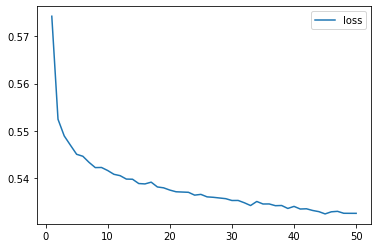

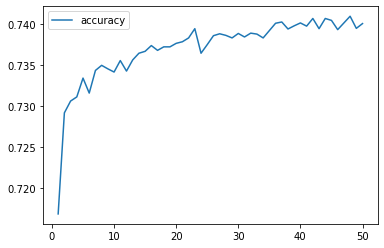

In [52]:
df_A2 = pd.DataFrame(fit_model_A2.history, index = range(1, len(fit_model_A2.history['loss']) + 1))

df_A2.plot( y = 'loss')
df_A2.plot( y = 'accuracy')

#### Alternative Model 3

In [53]:
# Define Alternative model 3 using:
# Drop the columns - Status and Special Considerations - from the original dataset
# Scale the new Dataframe using Standard Scaler
# Add 3 hidden layers
# The number of nodes for the first layer = 50% of the number of input features
# The number of nodes for the second layer = 30% of the number of input features
# The number of nodes for the third layer = 20% of the number of input features
# using relu as the activation function
# use 100 epochs

In [54]:
# Drop the Status and Special Considerations columns from the training and testing data
X_train_A3 = X_train.drop(columns = ['STATUS', 'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'])
X_test_A3 = X_test.drop(columns = ['STATUS', 'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'])

In [55]:
# Scale the new training and testing data using StandardScaler
X_scaler_A3 = StandardScaler()
X_scaler_A3.fit(X_train_A3)
X_train_scaled_A3 = X_scaler_A3.transform(X_train_A3)
X_test_scaled_A3 = X_scaler_A3.transform(X_test_A3)

In [56]:
# Define the the number of inputs (features) to the model
number_input_features_A3 = len(X_train_A3.iloc[0])

# Review the number of features
number_input_features_A3

113

In [57]:
# Define the number of neurons in the output layer
number_output_neurons_A3 = 1

In [58]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A3 = int(number_input_features_A3* 0.5)

# Review the number hidden nodes in the first layer
hidden_nodes_layer1_A3


56

In [59]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A3 =  int(number_input_features_A3 * 0.3)

# Review the number hidden nodes in the second layer
hidden_nodes_layer2_A3


33

In [60]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A3 =  int(number_input_features_A3 * 0.2)

# Review the number hidden nodes in the third layer
hidden_nodes_layer3_A3


22

In [61]:
# Create the Sequential model instance
nn_A3 = Sequential()

In [62]:
# First hidden layer
nn_A3.add(Dense(units = hidden_nodes_layer1_A3, input_dim = number_input_features_A3, activation = 'relu'))

#Second hidden layer
nn_A3.add(Dense(units = hidden_nodes_layer2_A3, activation = 'relu'))

#S Third hidden layer
nn_A3.add(Dense(units = hidden_nodes_layer3_A3, activation = 'relu'))

# Output layer
nn_A3.add(Dense(units = number_output_neurons_A3, activation = 'sigmoid'))

# Check the structure of the model
nn_A3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 56)                6384      
                                                                 
 dense_11 (Dense)            (None, 33)                1881      
                                                                 
 dense_12 (Dense)            (None, 22)                748       
                                                                 
 dense_13 (Dense)            (None, 1)                 23        
                                                                 
Total params: 9,036
Trainable params: 9,036
Non-trainable params: 0
_________________________________________________________________


In [63]:
# Compile the Sequential model
nn_A3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [64]:
# Fit the model using 50 epochs and the training data
fit_model_A3 = nn_A3.fit(X_train_scaled_A3, y_train, epochs = 100)


Epoch 1/100
804/804 [==============================] - 1s 789us/step - loss: 0.5745 - accuracy: 0.7168
Epoch 2/100
804/804 [==============================] - 1s 789us/step - loss: 0.5509 - accuracy: 0.7298
Epoch 3/100
804/804 [==============================] - 1s 794us/step - loss: 0.5476 - accuracy: 0.7312
Epoch 4/100
804/804 [==============================] - 1s 791us/step - loss: 0.5461 - accuracy: 0.7345
Epoch 5/100
804/804 [==============================] - 1s 791us/step - loss: 0.5449 - accuracy: 0.7344
Epoch 6/100
804/804 [==============================] - 1s 799us/step - loss: 0.5438 - accuracy: 0.7336
Epoch 7/100
804/804 [==============================] - 1s 797us/step - loss: 0.5422 - accuracy: 0.7344
Epoch 8/100
804/804 [==============================] - 1s 798us/step - loss: 0.5418 - accuracy: 0.7337
Epoch 9/100
804/804 [==============================] - 1s 801us/step - loss: 0.5413 - accuracy: 0.7352
Epoch 10/100
804/804 [==============================] - 1s 801us/step - l

In [65]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss_A3, model_accuracy_A3 = nn_A3.evaluate(X_test_scaled_A3, y_test, verbose = 2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss_A3}, Accuracy: {model_accuracy_A3}")

268/268 - 0s - loss: 0.5635 - accuracy: 0.7296 - 209ms/epoch - 780us/step
Loss: 0.5634780526161194, Accuracy: 0.7295626997947693


<AxesSubplot:>

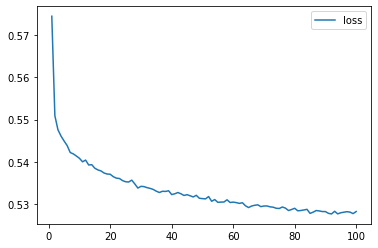

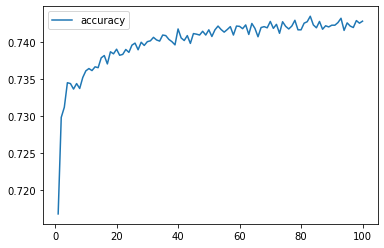

In [66]:
df_A3 = pd.DataFrame(fit_model_A3.history, index = range(1, len(fit_model_A3.history['loss']) + 1))

df_A3.plot( y = 'loss')
df_A3.plot( y = 'accuracy')

### Step 2: After finishing your models, display the accuracy scores achieved by each model, and compare the results.

In [67]:
print("Original Model Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy =nn.evaluate(X_test_scaled, y_test, verbose = 2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Original Model Results
268/268 - 0s - loss: 0.5560 - accuracy: 0.7294 - 134ms/epoch - 501us/step
Loss: 0.5560493469238281, Accuracy: 0.7294460535049438


In [68]:
print("Alternative Model 1 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A1.evaluate(X_test_scaled, y_test, verbose = 2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 1 Results
268/268 - 0s - loss: 0.5529 - accuracy: 0.7304 - 138ms/epoch - 514us/step
Loss: 0.5528753995895386, Accuracy: 0.7303789854049683


In [69]:
print("Alternative Model 2 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A2.evaluate(X_test_scaled, y_test, verbose = 2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 2 Results
268/268 - 0s - loss: 0.5542 - accuracy: 0.7314 - 135ms/epoch - 502us/step
Loss: 0.5541973114013672, Accuracy: 0.7314285635948181


In [70]:
print("Alternative Model 3 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A3.evaluate(X_test_scaled_A3, y_test, verbose = 2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 3 Results
268/268 - 0s - loss: 0.5635 - accuracy: 0.7296 - 135ms/epoch - 502us/step
Loss: 0.5634780526161194, Accuracy: 0.7295626997947693


### Step 3: Save each of your alternative models as an HDF5 file.


In [71]:
# Set the file path for the first alternative model
file_path = "./Resources/Alternative_model_1.h5"
# Export your model to a HDF5 file
nn_A1.save(file_path)


In [72]:
# Set the file path for the second alternative model
file_path = "./Resources/Alternative_model_2.h5"
# Export your model to a HDF5 file
nn_A2.save(file_path)

In [73]:
# Set the file path for the third alternative model
file_path = "./Resources/Alternative_model_3.h5"
# Export your model to a HDF5 file
nn_A3.save(file_path)